In [3]:
import pandas as pd
from sklearn import datasets

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()

# Convertirlo en un DataFrame de Pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Agregar la columna de especies

# Mostrar las primeras filas
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Separar características y etiquetas
X = iris.data
y = iris.target

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo de Regresión Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

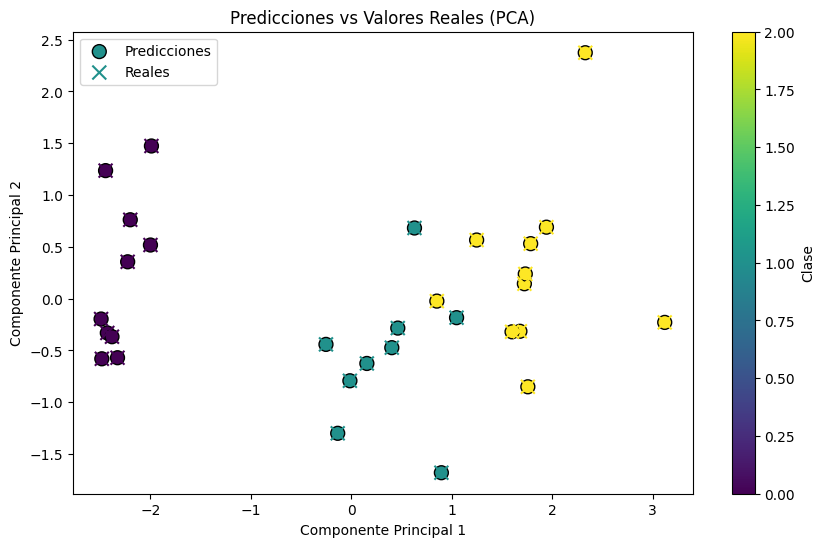

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Crear un gráfico de dispersión para las predicciones
plt.figure(figsize=(10, 6))

# Graficar puntos predichos
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', marker='o', label='Predicciones', edgecolor='k', s=100)

# Graficar puntos reales
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Reales', s=100)

plt.title('Predicciones vs Valores Reales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.colorbar(label='Clase')
plt.show()